
# [k近傍法(k-Nearest Neighbor)の理解](https://docs.opencv.org/master/d5/d26/tutorial_py_knn_understanding.html)

#### 最近傍法（Nearest Neighbor）
対象のデータから、最も近い距離にある１つデータのクラスに分類する方法

#### k近傍法（k-Nearest Neighbor） 
対象のデータから、最も近い距離にあるk個のデータのうち多数決でクラスを分類する方法

#### 変形k近傍法（modified kNN）
kNNの各特徴量に重みを与え、総和が一番大きなクラスに分類する方法

## OpenCV による分類

以下のクラスを用意して、25個のデータを作ります。
* red:  Class-0
* blue: Class-1

各データは x, y 軸それぞれに 0-99 の値を持ちます。

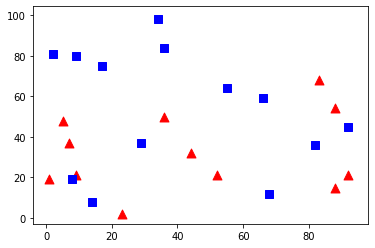

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Labels each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
# Take Red families and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue families and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
plt.show()

result:  [[0.]]

neighbours:  [[1. 0. 0.]]

distance:  [[ 20. 281. 521.]]



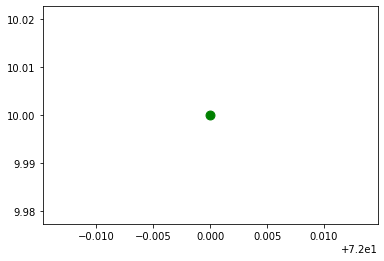

In [19]:
# 新しいデータを用意してプロットします。
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

# kNN モデルを作成して、先程の訓練データとターゲットからモデルを訓練します。
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)

# 訓練したモデルで新しいデータを分類します。
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)

# k-NN によって求めて新しいデータのクラス
print( "result:  {}\n".format(results) )

# k近傍点のラベル
print( "neighbours:  {}\n".format(neighbours) )

# 新しいデータとk近傍点との距離
print( "distance:  {}\n".format(dist) )

plt.show()

In [24]:
# 10 new comers
newcomers = np.random.randint(0,100,(10,2)).astype(np.float32)
ret, results,neighbours,dist = knn.findNearest(newcomers, 3)
# The results also will contain 10 labels.

# k-NN によって求めて新しいデータのクラス
print( "result:  {}\n".format(results) )

# k近傍点のラベル
print( "neighbours:  {}\n".format(neighbours) )

# 新しいデータとk近傍点との距離
print( "distance:  {}\n".format(dist) )

plt.show()

result:  [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

neighbours:  [[1. 0. 0.]
 [0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]

distance:  [[  97.  137.  410.]
 [ 109.  160.  370.]
 [ 221.  234.  260.]
 [ 409. 1037. 1201.]
 [  45.  185.  698.]
 [ 901. 1009. 1306.]
 [ 106.  305.  317.]
 [  45.  290.  425.]
 [  74.  109.  205.]
 [ 425.  565.  626.]]

